<a href="https://colab.research.google.com/github/DaviAlefe/freeCodeCamp_projects/blob/master/Data_Analysis_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mean-Variance-Standard Deviation Calculator

In [ ]:
import numpy as np

def calculate(lista):
  if len(lista) != 9:
    raise ValueError("List must contain nine numbers.")

  matrix = np.reshape(lista, (3,3))

#axis1 são colunas, axis2 são linhas
  #Mean
  mean_axis2 = [np.mean(matrix[0]), np.mean(matrix[1]), np.mean(matrix[2])]
  mean_axis1 = [np.mean(matrix[:,0]), np.mean(matrix[:,1]), np.mean(matrix[:,2])]
  mean_flattened = np.mean(matrix)
  #var
  var_axis2 = [np.var(matrix[0]), np.var(matrix[1]), np.var(matrix[2])]
  var_axis1 = [np.var(matrix[:,0]), np.var(matrix[:,1]), np.var(matrix[:,2])]
  var_flattened = np.var(matrix)
  #std
  std_axis2 = [np.std(matrix[0]), np.std(matrix[1]), np.std(matrix[2])]
  std_axis1 = [np.std(matrix[:,0]), np.std(matrix[:,1]), np.std(matrix[:,2])]
  std_flattened = np.std(matrix)
  #max
  max_axis2 = [np.max(matrix[0]), np.max(matrix[1]), np.max(matrix[2])]
  max_axis1 = [np.max(matrix[:,0]), np.max(matrix[:,1]), np.max(matrix[:,2])]
  max_flattened = np.max(matrix)
  #min
  min_axis2 = [np.min(matrix[0]), np.min(matrix[1]), np.min(matrix[2])]
  min_axis1 = [np.min(matrix[:,0]), np.min(matrix[:,1]), np.min(matrix[:,2])]
  min_flattened = np.min(matrix)
  #sum
  sum_axis2 = [np.sum(matrix[0]), np.sum(matrix[1]), np.sum(matrix[2])]
  sum_axis1 = [np.sum(matrix[:,0]), np.sum(matrix[:,1]), np.sum(matrix[:,2])]
  sum_flattened = np.sum(matrix)

  data = {
  'mean': [mean_axis1, mean_axis2, mean_flattened],
  'variance': [var_axis1, var_axis2, var_flattened],
  'standard deviation': [std_axis1, std_axis2, std_flattened],
  'max': [max_axis1, max_axis2, max_flattened],
  'min': [min_axis1, min_axis2, min_flattened],
  'sum': [sum_axis1, sum_axis2, sum_flattened]
}

  return data

calculate([0,1,2,3,4,5,6,7,8])

True

#Demographic Data Analyzer


In [ ]:
import pandas as pd


def calculate_demographic_data(print_data=True):
    # Read data from file
    df = pd.read_csv('/content/drive/My Drive/freeCodeCamp_projects/adult.data.csv') #'./adult.data.csv' no repl

    # How many of each race are represented in this dataset? This should be a Pandas series with race names as the index labels.
    race_count = df.race.value_counts()

    # What is the average age of men?
    average_age_men = round(df.age.groupby(df.sex).mean()['Male'],1)

    # What is the percentage of people who have a Bachelor's degree?
    percentage_bachelors = round(100*df.education.value_counts()[2]/df.education.value_counts().sum(),1)

    # What percentage of people with advanced education (`Bachelors`, `Masters`, or `Doctorate`) make more than 50K?
    # What percentage of people without advanced education make more than 50K?

    # with and without `Bachelors`, `Masters`, or `Doctorate`
    higher_education = df.education.value_counts().loc[['Bachelors','Masters','Doctorate']].sum()
    lower_education = df.education.value_counts().loc[['HS-grad', 'Some-college', 'Assoc-voc', '11th',
       'Assoc-acdm', '10th', '7th-8th', 'Prof-school', '9th', '12th',
        '5th-6th', '1st-4th', 'Preschool']].sum()

    # percentage with salary >50K
    higher_education_rich_total = df.education.groupby(df.salary).value_counts()[[('>50K','Bachelors'),('>50K','Masters'),('>50K','Doctorate')]].sum()
    higher_education_rich = round(100* higher_education_rich_total / higher_education,1)
    lower_education_rich_total = df.education.groupby(df.salary).value_counts()['>50K'].sum() - higher_education_rich_total # total rich minus higher education rich
    lower_education_rich = round(100 * lower_education_rich_total / lower_education,1)

    # What is the minimum number of hours a person works per week (hours-per-week feature)?
    min_work_hours = df.iloc[:,-3].min()

    # What percentage of the people who work the minimum number of hours per week have a salary of >50K?
    num_min_workers = df.iloc[:,-3].value_counts().loc[min_work_hours]

    rich_percentage = 100 * df.iloc[:,-3].groupby(df.salary).value_counts().loc[('>50K',min_work_hours)] / num_min_workers

    # What country has the highest percentage of people that earn >50K?
    people_per_country = df.loc[:,'native-country'].value_counts()
    rich_people_per_country = df.loc[:,'native-country'].groupby(df.salary).value_counts()['>50K']
    country = []
    percentage = []
    percent_per_country = {'country':country,'percentage':percentage}

    for element in people_per_country.index:
      for elem in rich_people_per_country.index:
        if (element==elem):
          country.append(element)
          perc = 100 * rich_people_per_country.loc[elem]/ people_per_country.loc[element]
          percentage.append(perc)

    
    highest_earning_country = country[percentage.index(max(percentage))]
    highest_earning_country_percentage = round(max(percentage),1)

    # Identify the most popular occupation for those who earn >50K in India.
    rich_indians = df.loc[(df.loc[:,'salary'] == '>50K') & (df.loc[:,'native-country'] == 'India')]
    rich_indians_professions = rich_indians.occupation.value_counts()
    top_IN_occupation = rich_indians_professions.index[0] #rich_indians_professions in sorted decreasing

    # DO NOT MODIFY BELOW THIS LINE

    if print_data:
        print("Number of each race:\n", race_count) 
        print("Average age of men:", average_age_men)
        print(f"Percentage with Bachelors degrees: {percentage_bachelors}%")
        print(f"Percentage with higher education that earn >50K: {higher_education_rich}%")
        print(f"Percentage without higher education that earn >50K: {lower_education_rich}%")
        print(f"Min work time: {min_work_hours} hours/week")
        print(f"Percentage of rich among those who work fewest hours: {rich_percentage}%")
        print("Country with highest percentage of rich:", highest_earning_country)
        print(f"Highest percentage of rich people in country: {highest_earning_country_percentage}%")
        print("Top occupations in India:", top_IN_occupation)

    return {
        'race_count': race_count,
        'average_age_men': average_age_men,
        'percentage_bachelors': percentage_bachelors,
        'higher_education_rich': higher_education_rich,
        'lower_education_rich': lower_education_rich,
        'min_work_hours': min_work_hours,
        'rich_percentage': rich_percentage,
        'highest_earning_country': highest_earning_country,
        'highest_earning_country_percentage':
        highest_earning_country_percentage,
        'top_IN_occupation': top_IN_occupation
    }
calculate_demographic_data(print_data=True)

Number of each race:
 White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64
Average age of men: 39.4
Percentage with Bachelors degrees: 16.4%
Percentage with higher education that earn >50K: 46.5%
Percentage without higher education that earn >50K: 17.4%
Min work time: 1 hours/week
Percentage of rich among those who work fewest hours: 10.0%
Country with highest percentage of rich: Iran
Highest percentage of rich people in country: 41.9%
Top occupations in India: Prof-specialty


{'average_age_men': 39.4,
 'higher_education_rich': 46.5,
 'highest_earning_country': 'Iran',
 'highest_earning_country_percentage': 41.9,
 'lower_education_rich': 17.4,
 'min_work_hours': 1,
 'percentage_bachelors': 16.4,
 'race_count': White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
 Name: race, dtype: int64,
 'rich_percentage': 10.0,
 'top_IN_occupation': 'Prof-specialty'}

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/My Drive/freeCodeCamp_projects/adult.data.csv')
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
df.age.groupby(df.sex).mean()['Male']

39.43354749885268

#Medical Data Visualizer

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = [8,6]

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv('/content/drive/My Drive/freeCodeCamp_projects/medical_examination.csv')
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [ ]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349843,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.477253,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,3.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.active.value_counts()

1    56261
0    13739
Name: active, dtype: int64

In [ ]:
BMI = df.weight / (df.height/100)**2
overWeight =[]
for bmi in BMI:
  if bmi>25:
    overWeight.append(1)
  else:
    overWeight.append(0)
df['overweight'] = overWeight
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,1


In [ ]:
a = df.loc[:,['cholesterol','gluc']] > 1
df.loc[:,['cholesterol','gluc']] = a.astype(int)
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


##Catplot

In [ ]:
df_cat = pd.melt(df,id_vars=['cardio'],value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])
df_cat

,cardio,variable,value
0,0,cholesterol,0
1,1,cholesterol,1
2,1,cholesterol,1
3,1,cholesterol,0
4,0,cholesterol,0
...,...,...,...
419995,0,overweight,1
419996,1,overweight,1
419997,1,overweight,1
419998,1,overweight,1


In [ ]:
cardio0 = df_cat[df_cat.cardio ==0].variable.groupby(df_cat.value).value_counts()
cardio0 = cardio0.reset_index(name='total')
cardio0['cardio'] = 0
cardio1 = df_cat[df_cat.cardio ==1].variable.groupby(df_cat.value).value_counts()
cardio1 = cardio1.reset_index(name='total')
cardio1['cardio'] = 1
cardio1

df_cat = cardio0.append(cardio1)
df_cat

,value,variable,total,cardio
0,0,alco,33080,0
1,0,smoke,31781,0
2,0,gluc,30894,0
3,0,cholesterol,29330,0
4,0,overweight,15915,0
5,0,active,6378,0
6,1,active,28643,0
7,1,overweight,19106,0
8,1,cholesterol,5691,0
9,1,gluc,4127,0


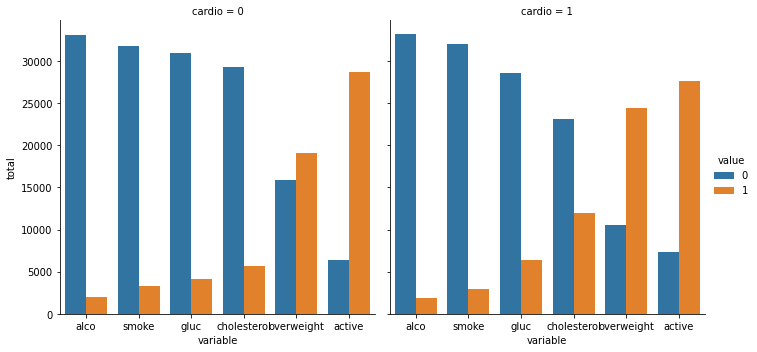

In [ ]:
sns.catplot(x='variable',y='total',hue='value',data=df_cat,col='cardio',kind='bar')

##Heatmap

In [ ]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [ ]:
clean_cond1 = np.where((df['ap_lo'] > df['ap_hi']))[0]
clean_cond2 = np.where(df['height'] < df['height'].quantile(0.025))[0]
clean_cond3 = np.where(df['height'] > df['height'].quantile(0.975))[0]
clean_cond4 = np.where(df['weight'] < df['weight'].quantile(0.025))[0]
clean_cond5 = np.where(df['weight'] > df['weight'].quantile(0.975))[0]
clean_cond = np.unique(np.concatenate([clean_cond1,clean_cond2,clean_cond3,clean_cond4,clean_cond5]))
df_heat = df.drop(clean_cond)
df_heat = df_heat.drop(['id'],axis=1)
df_heat

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69993,19699,1,172,70.0,130,90,1,1,0,0,1,1
69994,21074,1,165,80.0,150,80,1,1,0,0,1,1
69995,19240,2,168,76.0,120,80,1,1,1,0,1,0
69998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [ ]:
df_heat.corr()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
age,1.000000,-0.018132,-0.076932,0.070168,0.018689,0.153508,0.154642,0.097646,-0.044371,-0.026970,-0.011445,0.240241
gender,-0.018132,1.000000,0.505785,0.129979,0.005063,0.059947,-0.038756,-0.023419,0.337436,0.168637,0.007864,0.002320
height,-0.076932,0.505785,1.000000,0.251503,0.004586,0.017922,-0.065980,-0.028364,0.187830,0.089785,-0.005661,-0.024102
weight,0.070168,0.129979,0.251503,1.000000,0.027030,0.227922,0.137705,0.094133,0.056533,0.059917,-0.014430,0.170042
ap_hi,0.018689,0.005063,0.004586,0.027030,1.000000,0.072803,0.021499,0.010226,-0.001928,0.000769,-0.000222,0.050556
ap_lo,0.153508,0.059947,0.017922,0.227922,0.072803,1.000000,0.154348,0.067048,0.023275,0.033042,0.001569,0.327181
cholesterol,0.154642,-0.038756,-0.065980,0.137705,0.021499,0.154348,1.000000,0.451388,0.005696,0.031050,0.007381,0.219090
gluc,0.097646,-0.023419,-0.028364,0.094133,0.010226,0.067048,0.451388,1.000000,-0.010225,0.005805,-0.007709,0.087621
smoke,-0.044371,0.337436,0.187830,0.056533,-0.001928,0.023275,0.005696,-0.010225,1.000000,0.341200,0.026940,-0.020345
alco,-0.026970,0.168637,0.089785,0.059917,0.000769,0.033042,0.031050,0.005805,0.341200,1.000000,0.025847,-0.011088


In [ ]:
np.ones_like(df_heat.corr, dtype=np.bool)

array(True)

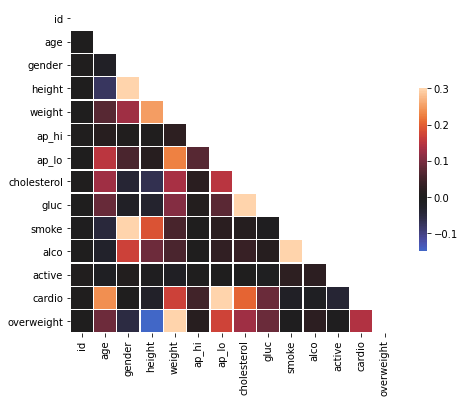

In [ ]:
mask = np.triu(np.ones_like(df_heat.corr(), dtype=np.bool))
sns.heatmap(df_heat.corr(), mask=mask, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

##To test on repl


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Import data
df = pd.read_csv('/content/drive/My Drive/freeCodeCamp_projects/medical_examination.csv') # './medical_examination.csv' on repl.it

# Add 'overweight' column
BMI = df.weight / (df.height/100)**2
overWeight =[]
for bmi in BMI:
  if bmi>25:
    overWeight.append(1)
  else:
    overWeight.append(0)
df['overweight'] = overWeight

# Normalize data by making 0 always good and 1 always bad. If the value of 'cholestorol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.
a = df.loc[:,['cholesterol','gluc']] > 1
df.loc[:,['cholesterol','gluc']] = a.astype(int)

# Draw Categorical Plot
def draw_cat_plot():
    # Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
    df_cat = df_cat = pd.melt(df,id_vars=['cardio'],value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])

    # Group and reformat the data to split it by 'cardio'. Show the counts of each feature. You will have to rename one of the collumns for the catplot to work correctly.
    cardio0 = df_cat[df_cat.cardio ==0].variable.groupby(df_cat.value).value_counts()
    cardio0 = cardio0.reset_index(name='total')
    cardio0['cardio'] = 0
    cardio1 = df_cat[df_cat.cardio ==1].variable.groupby(df_cat.value).value_counts()
    cardio1 = cardio1.reset_index(name='total')
    cardio1['cardio'] = 1
    cardio1

    df_cat = cardio0.append(cardio1)

    # Draw the catplot with 'sns.catplot()'
    g = sns.catplot(x='variable',y='total',hue='value',data=df_cat, order=sorted(['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight']),col='cardio',kind='bar')
    fig = g.fig

    # Do not modify the next two lines
    fig.savefig('catplot.png')
    return fig


# Draw Heat Map
def draw_heat_map():
    # Clean the data
    clean_cond1 = np.where((df['ap_lo'] > df['ap_hi']))[0]
    clean_cond2 = np.where(df['height'] < df['height'].quantile(0.025))[0]
    clean_cond3 = np.where(df['height'] > df['height'].quantile(0.975))[0]
    clean_cond4 = np.where(df['weight'] < df['weight'].quantile(0.025))[0]
    clean_cond5 = np.where(df['weight'] > df['weight'].quantile(0.975))[0]
    clean_cond = np.unique(np.concatenate([clean_cond1,clean_cond2,clean_cond3,clean_cond4,clean_cond5]))
    df_heat = df.drop(clean_cond)

    # Calculate the correlation matrix
    corr = df_heat.corr()

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=np.bool))

    # Set up the matplotlib figure
    fig, ax = plt.subplots(figsize=(11, 9))

    # Draw the heatmap with 'sns.heatmap()'
    sns.heatmap(corr, mask=mask, vmax=.3, center=0, annot=True, fmt='.1f',
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

   # Do not modify the next two lines
    fig.savefig('heatmap.png')
    return fig

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


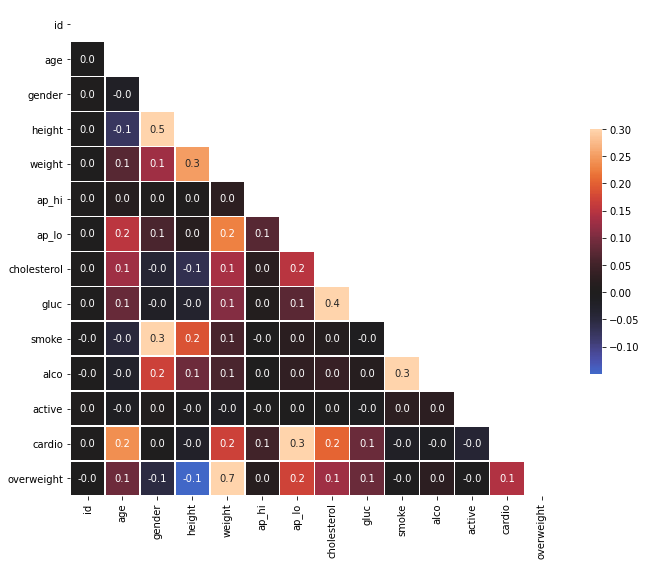

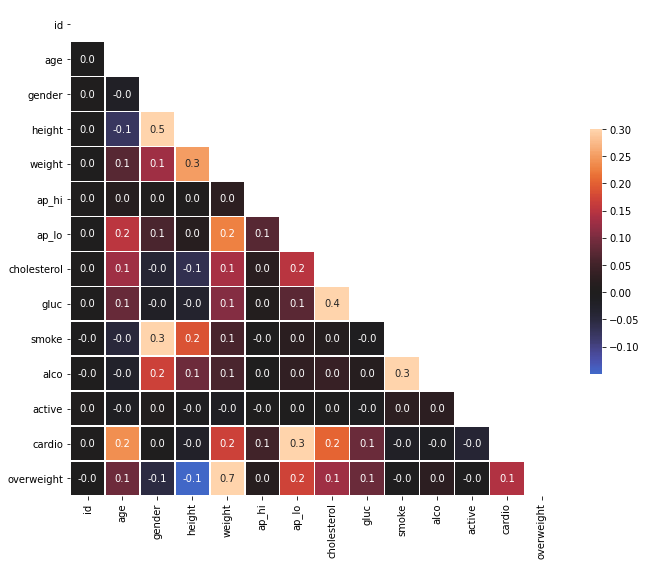

In [ ]:
draw_heat_map()

#Time Series Visualizer


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [ ]:
df = pd.read_csv('/content/drive/My Drive/freeCodeCamp_projects/fcc-forum-pageviews.csv',index_col='date',parse_dates=True)
df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [ ]:
df.describe()

,value
count,1.304000e+03
mean,6.722068e+04
std,5.933964e+04
min,1.201000e+03
25%,3.575775e+04
50%,5.719750e+04
75%,8.388300e+04
max,1.173655e+06


In [ ]:
df = df[(df.value > df.value.quantile(0.025)) & (df.value < df.value.quantile(0.975))]
df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


##Line Plot

Text(0, 0.5, 'Page Views')

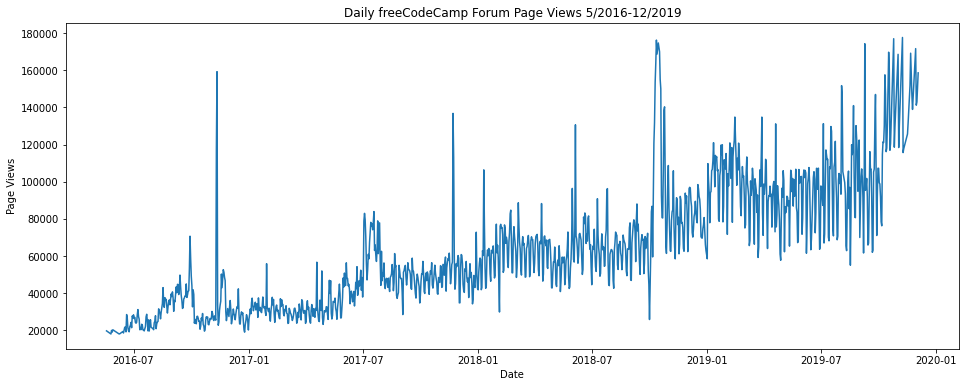

In [ ]:
fig, ax = plt.subplots(1,1,figsize = (16,6))
ax.plot(df.index, df.value)
ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
ax.set_xlabel('Date')
ax.set_ylabel('Page Views')

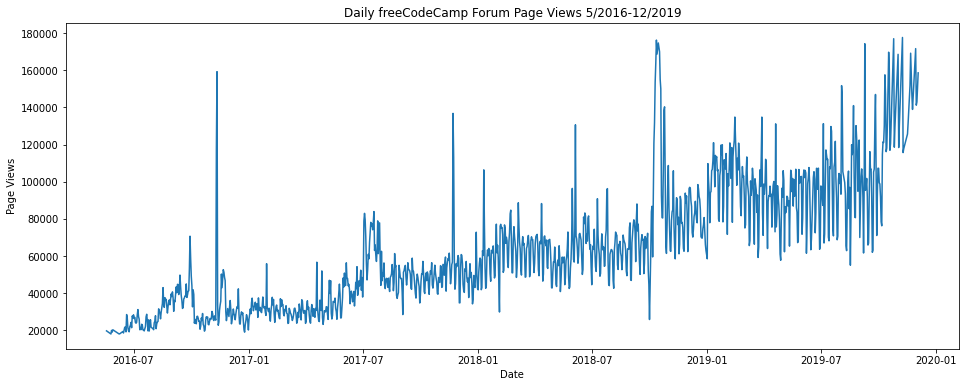

In [ ]:
fig

##Bar plot

In [ ]:
df.index.year

Int64Index([2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016,
            ...
            2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019],
           dtype='int64', name='date', length=1238)

In [ ]:
df_bar = df.value.groupby([df.index.year,df.index.month_name()]).mean()
df_bar.index.names = ['Years', 'Months']
df_bar = df_bar.reset_index(name='Average Page Views')
df_bar

,Years,Months,Average Page Views
0,2016,August,31049.193548
1,2016,December,27832.419355
2,2016,July,24109.678571
3,2016,June,21875.105263
4,2016,May,19432.400000
5,2016,November,40448.633333
6,2016,October,27398.322581
7,2016,September,41476.866667
8,2017,April,30878.733333
9,2017,August,47712.451613


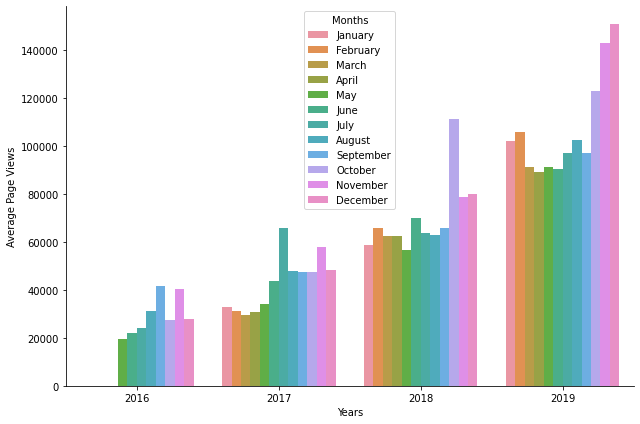

In [ ]:
g = sns.catplot(x='Years',y='Average Page Views',hue='Months', hue_order=['January','February','March','April','May','June','July','August', 'September','October','November','December'],data=df_bar, kind='bar',legend_out=False, height=6, aspect=1.5)
fig = g.fig


##Box plot

In [ ]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]
df_box

,date,value,year,month
0,2016-05-19,19736,2016,May
1,2016-05-26,18060,2016,May
2,2016-05-27,19997,2016,May
3,2016-05-28,19044,2016,May
4,2016-05-29,20325,2016,May
...,...,...,...,...
1233,2019-11-24,138875,2019,Nov
1234,2019-11-29,171584,2019,Nov
1235,2019-11-30,141161,2019,Nov
1236,2019-12-01,142918,2019,Dec


In [ ]:
df_box.rename({'year':'Year','month':'Month','value':'Page Views'},axis= 'columns',inplace=True)
df_box

,date,Page Views,Year,Month
0,2016-05-19,19736,2016,May
1,2016-05-26,18060,2016,May
2,2016-05-27,19997,2016,May
3,2016-05-28,19044,2016,May
4,2016-05-29,20325,2016,May
...,...,...,...,...
1233,2019-11-24,138875,2019,Nov
1234,2019-11-29,171584,2019,Nov
1235,2019-11-30,141161,2019,Nov
1236,2019-12-01,142918,2019,Dec


Text(0.5, 1.0, 'Month-wise Box Plot (Seasonality)')

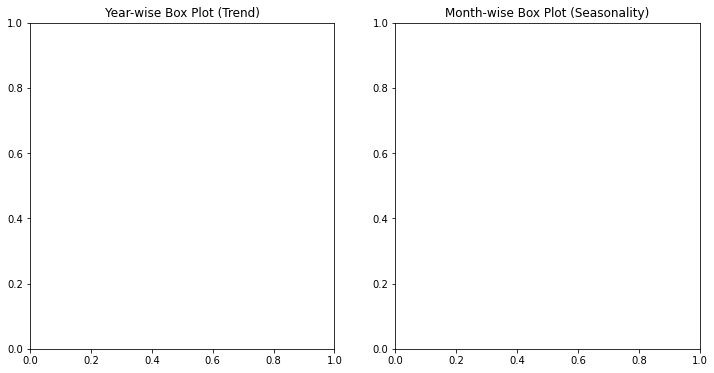

In [ ]:
fig, (yearwise,monthwise)= plt.subplots(1,2,figsize=(12,6))
yearwise.set_title('Year-wise Box Plot (Trend)')
monthwise.set_title('Month-wise Box Plot (Seasonality)')

In [ ]:
sns.boxplot(x='Year',y='Page Views',data=df_box,ax=yearwise)
sns.boxplot(x='Month',y='Page Views',order=['Jan','Feb','Mar','Apr','May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],data=df_box,ax=monthwise)

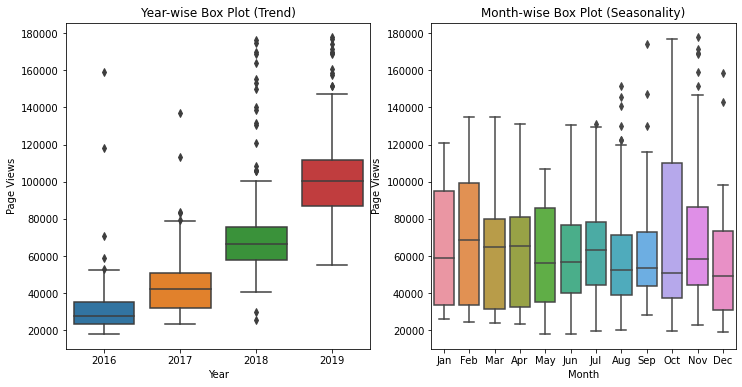

In [ ]:
fig

## To test on repl


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv('/content/drive/My Drive/freeCodeCamp_projects/fcc-forum-pageviews.csv',index_col='date',parse_dates=True) # './fcc-forum-pageviews.csv' on repl

# Clean data
df = df[(df.value > df.value.quantile(0.025)) & (df.value < df.value.quantile(0.975))]


def draw_line_plot():
    # Draw line plot
    fig, ax = plt.subplots(1,1,figsize = (16,6))
    ax.plot(df.index, df.value)
    ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    ax.set_xlabel('Date')
    ax.set_ylabel('Page Views')

    # Save image and return fig (don't change this part)
    fig.savefig('line_plot.png')
    return fig

def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_bar = df.value.groupby([df.index.year,df.index.month_name()]).mean()
    df_bar.index.names = ['Years', 'Months']
    df_bar = df_bar.reset_index(name='Average Page Views')

    # Draw bar plot
    g = sns.catplot(x='Years',y='Average Page Views',hue='Months', hue_order=['January','February','March','April','May','June','July','August', 'September','October','November','December'],data=df_bar, kind='bar',legend_out=False, height=6, aspect=1.5)
    fig = g.fig

    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
    return fig

def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]
    df_box.rename({'year':'Year','month':'Month','value':'Page Views'},axis= 'columns',inplace=True)

    # Draw box plots (using Seaborn)
    fig, (yearwise,monthwise)= plt.subplots(1,2,figsize=(12,6))
    yearwise.set_title('Year-wise Box Plot (Trend)')
    monthwise.set_title('Month-wise Box Plot (Seasonality)')
    sns.boxplot(x='Year',y='Page Views',data=df_box,ax=yearwise)
    sns.boxplot(x='Month',y='Page Views',order=['Jan','Feb','Mar','Apr','May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],data=df_box,ax=monthwise)
    
    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    return fig


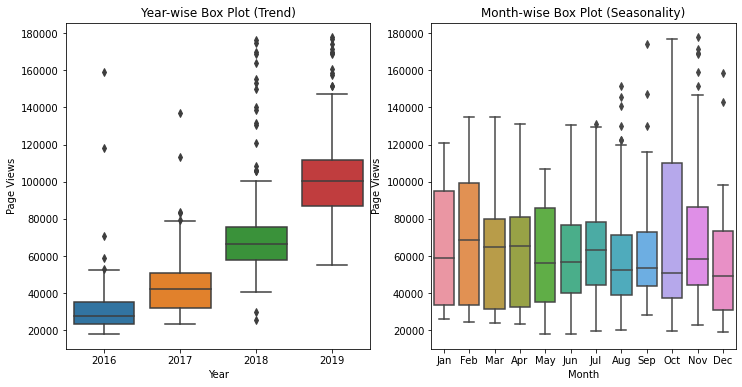

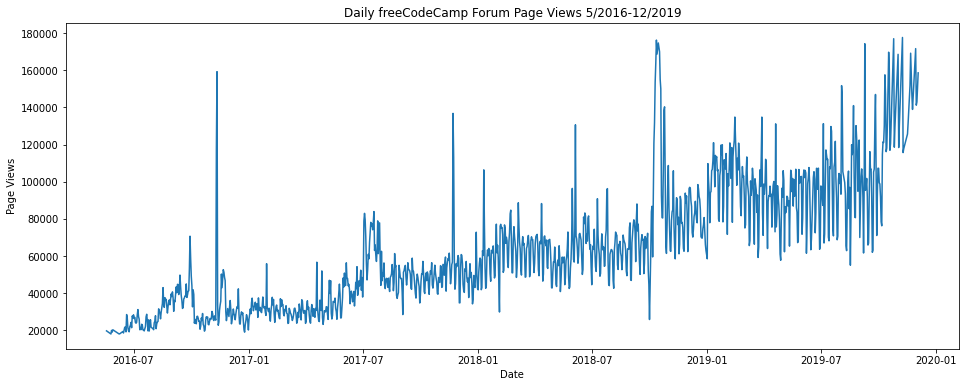

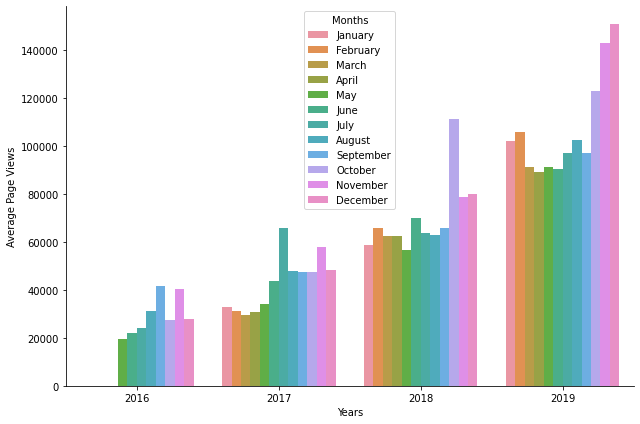

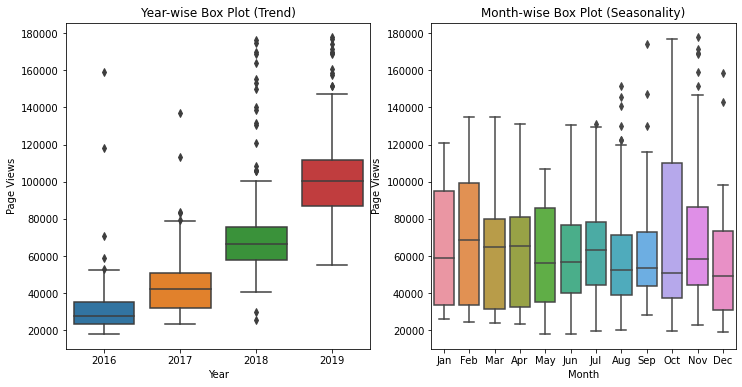

In [ ]:
draw_line_plot()
draw_bar_plot()
draw_box_plot()

#Sea Level Predictor


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
%matplotlib inline
plt.rcParams['figure.figsize'] = [8,6]

In [ ]:
df = pd.read_csv('/content/drive/My Drive/freeCodeCamp_projects/epa-sea-level.csv')
df

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN
...,...,...,...,...,...
129,2009,8.586614,8.311024,8.862205,8.046354
130,2010,8.901575,8.618110,9.185039,8.122973
131,2011,8.964567,8.661417,9.267717,8.053065
132,2012,9.326772,8.992126,9.661417,8.457058


In [ ]:
df.describe()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
count,134.000000,134.000000,134.000000,134.000000,21.000000
mean,1946.500000,3.650341,3.204666,4.096016,7.363746
std,38.826537,2.485692,2.663781,2.312581,0.691038
min,1880.000000,-0.440945,-1.346457,0.464567,6.297493
25%,1913.250000,1.632874,1.078740,2.240157,6.848690
50%,1946.500000,3.312992,2.915354,3.710630,7.488353
75%,1979.750000,5.587598,5.329724,5.845472,7.907365
max,2013.000000,9.326772,8.992126,9.661417,8.546648


Text(0.5, 1.0, 'Rise in Sea Level')

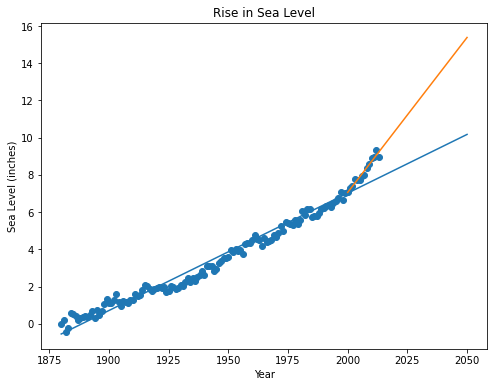

In [ ]:
x = df.Year
y = df.iloc[:,1]
plt.scatter(x,y)

lr1 = linregress(x,y)
x_ext = x.append(pd.Series(range(x[len(x)-1]+1,2051)))
plt.plot(x_ext, lr1.intercept+lr1.slope*x_ext)

x_recent = x[x>=2000]
y_recent = y[x[x==2000].index[0]:]
lr2 = linregress(x_recent,y_recent)
x_ext_recent = x_recent.append(pd.Series(range(x[len(x)-1]+1,2051)))
plt.plot(x_ext_recent, lr2.intercept+lr2.slope*x_ext_recent)

plt.xlabel('Year')
plt.ylabel('Sea Level (inches)')
plt.title('Rise in Sea Level')

In [ ]:
lr2.intercept+lr2.slope*x_ext

0    -12.910193
1    -12.743766
2    -12.577338
3    -12.410911
4    -12.244484
        ...    
32    14.716734
33    14.883162
34    15.049589
35    15.216016
36    15.382444
Length: 171, dtype: float64

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

def draw_plot():
    # Read data from file
    df = pd.read_csv('/content/drive/My Drive/freeCodeCamp_projects/epa-sea-level.csv') # './epa-sea-level.csv' on repl

    # Create scatter plot
    x = df.Year
    y = df.iloc[:,1]
    plt.scatter(x,y)
    
    # Create first line of best fit
    lr1 = linregress(x,y)
    x_ext = x.append(pd.Series(range(x[len(x)-1]+1,2050)))
    plt.plot(x_ext, lr1.intercept+lr1.slope*x_ext)

    # Create second line of best fit
    x_recent = x[x>=2000]
    y_recent = y[x[x==2000].index[0]:]
    lr2 = linregress(x_recent,y_recent)
    x_ext_recent = x_recent.append(pd.Series(range(x[len(x)-1]+1,2050)))
    plt.plot(x_ext_recent, lr2.intercept+lr2.slope*x_ext_recent)


    # Add labels and title
    plt.xlabel('Year')
    plt.ylabel('Sea Level (inches)')
    plt.title('Rise in Sea Level')
    
    # Save plot and return data for testing (DO NOT MODIFY)
    plt.savefig('sea_level_plot.png')
    return plt.gca()

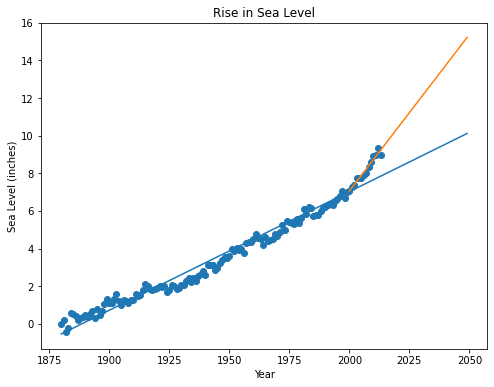

In [ ]:
draw_plot()